In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df = pd.read_csv('loan_data_cleaned.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [41]:
df.shape

(614, 13)

In [42]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [43]:
check_outlier_df = df.select_dtypes(include=['int64','float64'])
check_outlier_df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,146.412162,360.0,1.0
1,4583,1508.0,128.000000,360.0,1.0
2,3000,0.0,66.000000,360.0,1.0
3,2583,2358.0,120.000000,360.0,1.0
4,6000,0.0,141.000000,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0
610,4106,0.0,40.000000,180.0,1.0
611,8072,240.0,253.000000,360.0,1.0
612,7583,0.0,187.000000,360.0,1.0


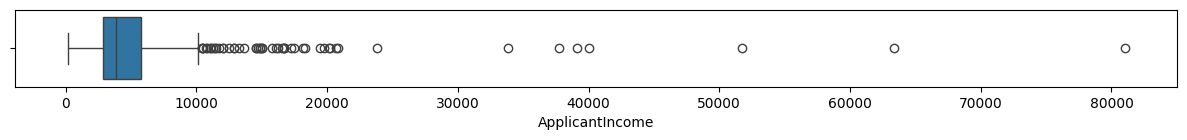

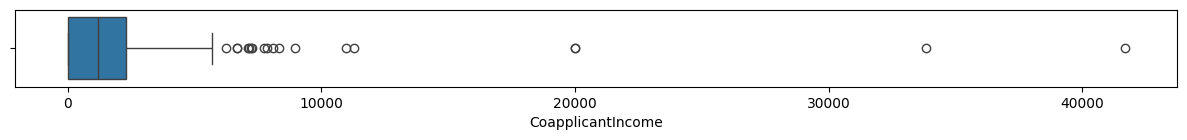

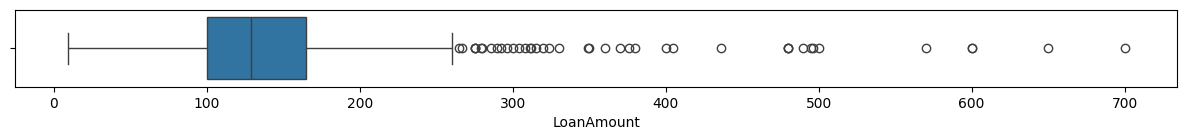

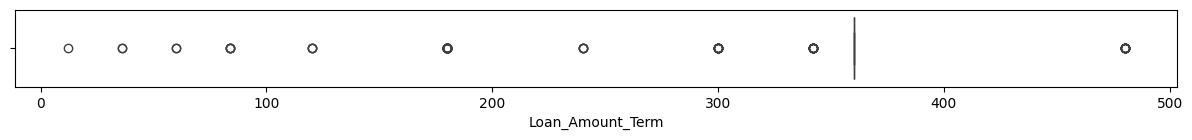

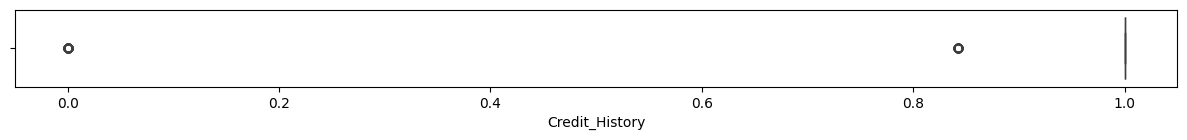

In [44]:
for c_o in check_outlier_df:
    plt.figure(figsize=(15,1))
    sns.boxplot(x=c_o,data=df)
    plt.show()

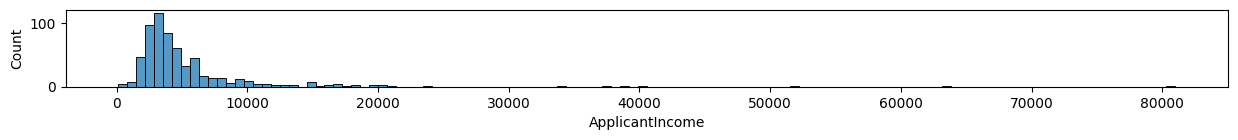

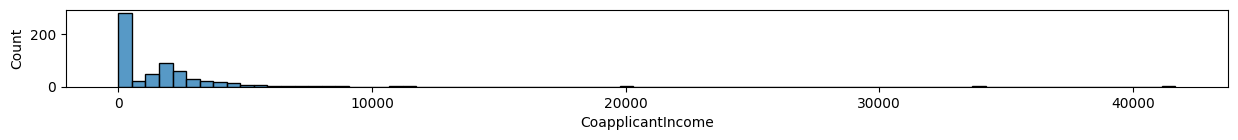

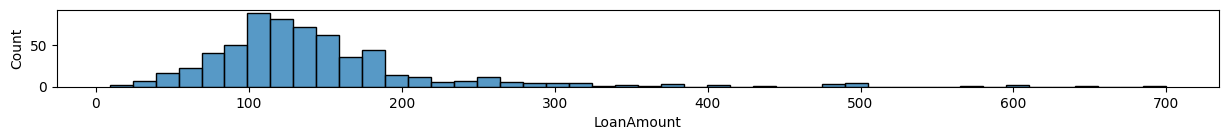

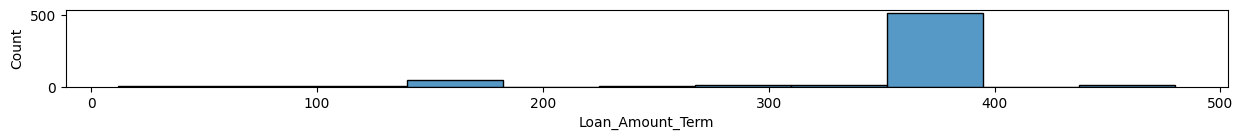

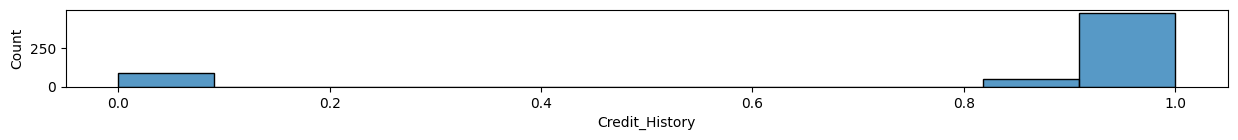

In [45]:
for c_o2 in check_outlier_df:
    plt.figure(figsize=(15,1))
    sns.histplot(x=c_o2,data=df)
    plt.show()

In [46]:
df.select_dtypes(include=[int,float])

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,146.412162,360.0,1.0
1,4583,1508.0,128.000000,360.0,1.0
2,3000,0.0,66.000000,360.0,1.0
3,2583,2358.0,120.000000,360.0,1.0
4,6000,0.0,141.000000,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0
610,4106,0.0,40.000000,180.0,1.0
611,8072,240.0,253.000000,360.0,1.0
612,7583,0.0,187.000000,360.0,1.0


In [47]:
ai_q1 = df['ApplicantIncome'].quantile(0.25)
ai_q3 = df['ApplicantIncome'].quantile(0.75)

ai_IQR = ai_q3-ai_q1

ai_min_range = ai_q1 - (1.5*ai_IQR)
ai_max_range = ai_q3 + (1.5*ai_IQR)

ai_min_range,ai_max_range

new_df = df[df['ApplicantIncome']<=ai_max_range]
new_df.shape

(564, 13)

In [48]:
co_ai_q1 = df['CoapplicantIncome'].quantile(0.25)
co_ai_q3 = df['CoapplicantIncome'].quantile(0.75)

co_ai_IQR = co_ai_q3-co_ai_q1

co_ai_min_range = co_ai_q1 - (1.5*co_ai_IQR)
co_ai_max_range = co_ai_q3 + (1.5*co_ai_IQR)

co_ai_min_range,co_ai_max_range

new_df = new_df[new_df['CoapplicantIncome']<=co_ai_max_range]
new_df.shape

(548, 13)

In [49]:
la_q1 = df['LoanAmount'].quantile(0.25)
la_q3 = df['LoanAmount'].quantile(0.75)

la_IQR = la_q3-la_q1

la_min_range = la_q1 - (1.5*la_IQR)
la_max_range = la_q3 + (1.5*la_IQR)

(la_min_range,la_max_range)

new_df = new_df[new_df['LoanAmount']<=la_max_range]
new_df.shape

(535, 13)

In [50]:
lat_q1 = df['Loan_Amount_Term'].quantile(0.25)
lat_q3 = df['Loan_Amount_Term'].quantile(0.75)

lat_IQR = lat_q3-lat_q1

lat_min_range = lat_q1 - (1.5*lat_IQR)
lat_max_range = lat_q3 + (1.5*lat_IQR)

(lat_min_range,lat_max_range)

new_df = new_df[new_df['Loan_Amount_Term']>=lat_min_range]
new_df.shape

(459, 13)

In [51]:
lat_q1 = df['Loan_Amount_Term'].quantile(0.25)
lat_q3 = df['Loan_Amount_Term'].quantile(0.75)

lat_IQR = lat_q3-lat_q1

lat_min_range = lat_q1 - (1.5*lat_IQR)
lat_max_range = lat_q3 + (1.5*lat_IQR)

(lat_min_range,lat_max_range)

new_df = new_df[new_df['Loan_Amount_Term']<=lat_max_range]
new_df.shape

(445, 13)

In [52]:
ch_q1 = df['Credit_History'].quantile(0.25)
ch_q3 = df['Credit_History'].quantile(0.75)

ch_IQR = ch_q3-ch_q1

ch_min_range = ch_q1 - (1.5*ch_IQR)
ch_max_range = ch_q3 + (1.5*ch_IQR)

(ch_min_range,ch_max_range)

new_df = new_df[new_df['Credit_History']>=ch_min_range]
new_df.shape

(350, 13)

In [53]:
new_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [54]:
new_df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [55]:
new_df.reset_index(drop=True,inplace=True)
new_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.000000,360.0,1.0,Rural,Y
346,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.000000,360.0,1.0,Rural,Y
347,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
348,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y


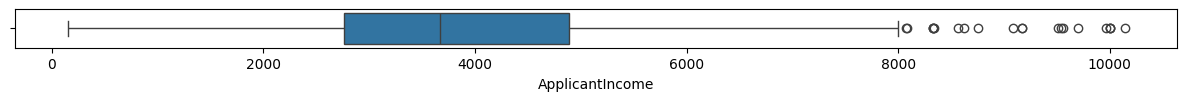

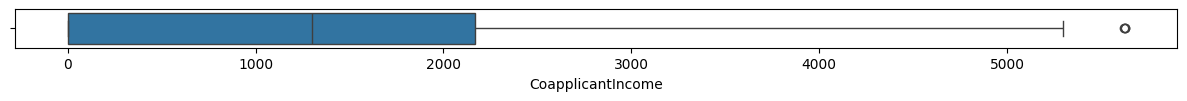

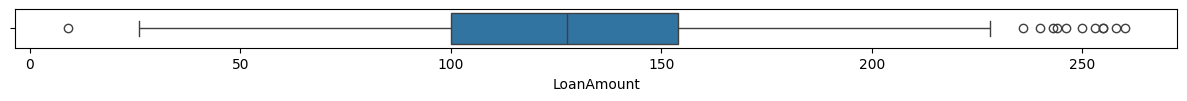

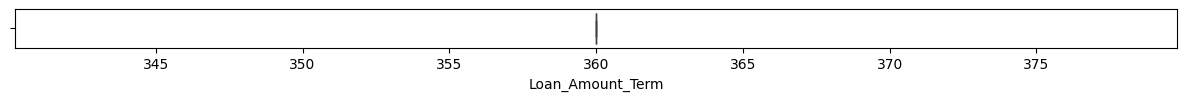

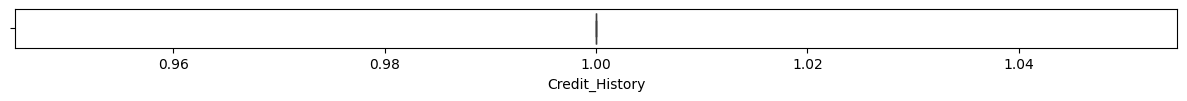

In [56]:
for ot in new_df.select_dtypes(include=[int,float]):
    plt.figure(figsize=(15,0.5))
    sns.boxplot(x=ot,data=new_df)
    plt.show()

In [57]:
print('Before removing outliers:',df.shape)
print('After removing outliers:',new_df.shape)


Before removing outliers: (614, 13)
After removing outliers: (350, 13)
